In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
import os
from collections import Counter

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Paths
BASE_PATH = Path("BDMA7_project_files")
TRAIN_PATH = BASE_PATH / "train_images"
VAL_PATH = BASE_PATH / "val_images"
TEST_PATH = BASE_PATH / "test_images"

In [4]:
# Load metadata
train_df = pd.read_csv(BASE_PATH / "train_metadata.csv")
val_df = pd.read_csv(BASE_PATH / "val_metadata.csv")
sample_submission = pd.read_csv(BASE_PATH / "sample_submission.csv")


print(f"Training samples:   {len(train_df)}")
print(f"Validation samples: {len(val_df)}")
print(f"Test samples:       {len(sample_submission)}")
print(f"Total samples:      {len(train_df) + len(val_df) + len(sample_submission)}")
print(f"\nNumber of classes:  {train_df['class'].nunique()}")

Training samples:   1082
Validation samples: 103
Test samples:       400
Total samples:      1585

Number of classes:  20


In [5]:
# training data sample
print("Training DataFrame:")
display(train_df.head(10))


Training DataFrame:


,path,class,class_idx
0,Brandt_Cormorant/Brandt_Cormorant_0071_23007.jpg,Brandt_Cormorant,4
1,Brandt_Cormorant/Brandt_Cormorant_0028_22892.jpg,Brandt_Cormorant,4
2,Brandt_Cormorant/Brandt_Cormorant_0076_23021.jpg,Brandt_Cormorant,4
3,Brandt_Cormorant/Brandt_Cormorant_0080_23002.jpg,Brandt_Cormorant,4
4,Brandt_Cormorant/Brandt_Cormorant_0045_22916.jpg,Brandt_Cormorant,4
5,Brandt_Cormorant/Brandt_Cormorant_0018_23090.jpg,Brandt_Cormorant,4
6,Brandt_Cormorant/Brandt_Cormorant_0035_23000.jpg,Brandt_Cormorant,4
7,Brandt_Cormorant/Brandt_Cormorant_0044_22884.jpg,Brandt_Cormorant,4
8,Brandt_Cormorant/Brandt_Cormorant_0072_23069.jpg,Brandt_Cormorant,4
9,Brandt_Cormorant/Brandt_Cormorant_0064_22849.jpg,Brandt_Cormorant,4


In [6]:
print("\nClass mapping between class_idx and class name:")
class_mapping = train_df[['class_idx', 'class']].drop_duplicates().sort_values('class_idx').reset_index(drop=True)
display(class_mapping)


Class mapping between class_idx and class name:


,class_idx,class
0,0,Groove_billed_Ani
1,1,Red_winged_Blackbird
2,2,Rusty_Blackbird
3,3,Gray_Catbird
4,4,Brandt_Cormorant
5,5,Eastern_Towhee
6,6,Indigo_Bunting
7,7,Brewer_Blackbird
8,8,Painted_Bunting
9,9,Bobolink


In [7]:
# validation data sample
print("Validation DataFrame:")
display(val_df.head(10))

Validation DataFrame:


,path,class,class_idx
0,Brandt_Cormorant/Brandt_Cormorant_0092_23061.jpg,Brandt_Cormorant,4
1,Brandt_Cormorant/Brandt_Cormorant_0047_23337.jpg,Brandt_Cormorant,4
2,Brandt_Cormorant/Brandt_Cormorant_0083_23156.jpg,Brandt_Cormorant,4
3,Brandt_Cormorant/Brandt_Cormorant_0070_23137.jpg,Brandt_Cormorant,4
4,Brandt_Cormorant/Brandt_Cormorant_0009_22890.jpg,Brandt_Cormorant,4
5,Brandt_Cormorant/Brandt_Cormorant_0039_22945.jpg,Brandt_Cormorant,4
6,Brown_Creeper/Brown_Creeper_0089_24841.jpg,Brown_Creeper,14
7,Brown_Creeper/Brown_Creeper_0059_25010.jpg,Brown_Creeper,14
8,Brown_Creeper/Brown_Creeper_0113_24560.jpg,Brown_Creeper,14
9,Brown_Creeper/Brown_Creeper_0035_24941.jpg,Brown_Creeper,14


In [8]:
# make sure val has same class mapping as train
val_class_mapping = val_df[['class_idx', 'class']].drop_duplicates().sort_values('class_idx').reset_index(drop=True)
# display(val_class_mapping)
val_class_mapping.equals(class_mapping)



True

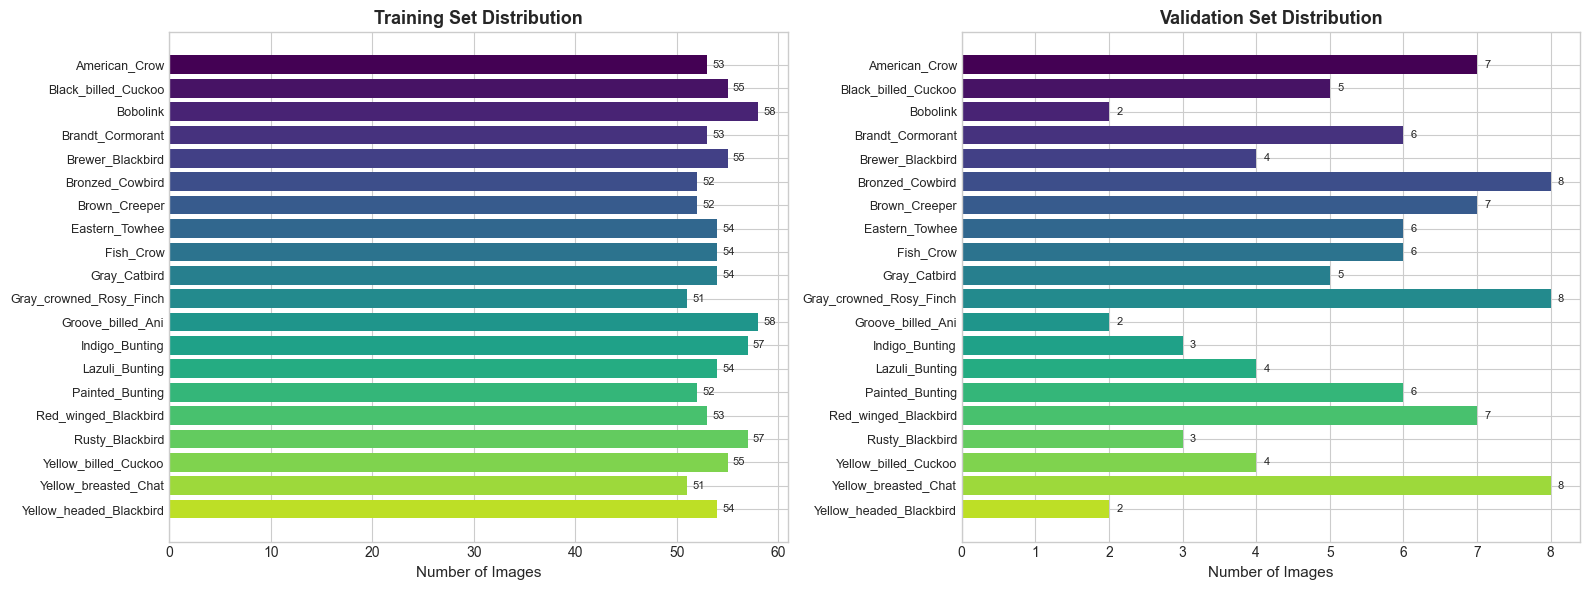


Training Set Statistics:
Min samples per class: 51 (Gray_crowned_Rosy_Finch)
Max samples per class: 58 (Bobolink)
Mean samples per class: 54.1
Std: 2.1


In [9]:
# Class distribution visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set distribution
train_counts = train_df['class'].value_counts().sort_index()
colors = plt.cm.viridis(np.linspace(0, 0.9, len(train_counts)))

ax1 = axes[0]
bars = ax1.barh(range(len(train_counts)), train_counts.values, color=colors)
ax1.set_yticks(range(len(train_counts)))
ax1.set_yticklabels(train_counts.index, fontsize=9)
ax1.set_xlabel('Number of Images', fontsize=11)
ax1.set_title('Training Set Distribution', fontsize=13, fontweight='bold')
ax1.invert_yaxis()
for i, v in enumerate(train_counts.values):
    ax1.text(v + 0.5, i, str(v), va='center', fontsize=8)

# Validation set distribution
val_counts = val_df['class'].value_counts().sort_index()
ax2 = axes[1]
bars2 = ax2.barh(range(len(val_counts)), val_counts.values, color=colors)
ax2.set_yticks(range(len(val_counts)))
ax2.set_yticklabels(val_counts.index, fontsize=9)
ax2.set_xlabel('Number of Images', fontsize=11)
ax2.set_title('Validation Set Distribution', fontsize=13, fontweight='bold')
ax2.invert_yaxis()
for i, v in enumerate(val_counts.values):
    ax2.text(v + 0.1, i, str(v), va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Statistics
print(f"\nTraining Set Statistics:")
print(f"Min samples per class: {train_counts.min()} ({train_counts.idxmin()})")
print(f"Max samples per class: {train_counts.max()} ({train_counts.idxmax()})")
print(f"Mean samples per class: {train_counts.mean():.1f}")
print(f"Std: {train_counts.std():.1f}")

clearly the val set is not representative of the training (i think we need to merge them and then do k fold cross validation)

Dataset is relatively balanced (50-58 images per class in training), but what will happen if we merge val with training?

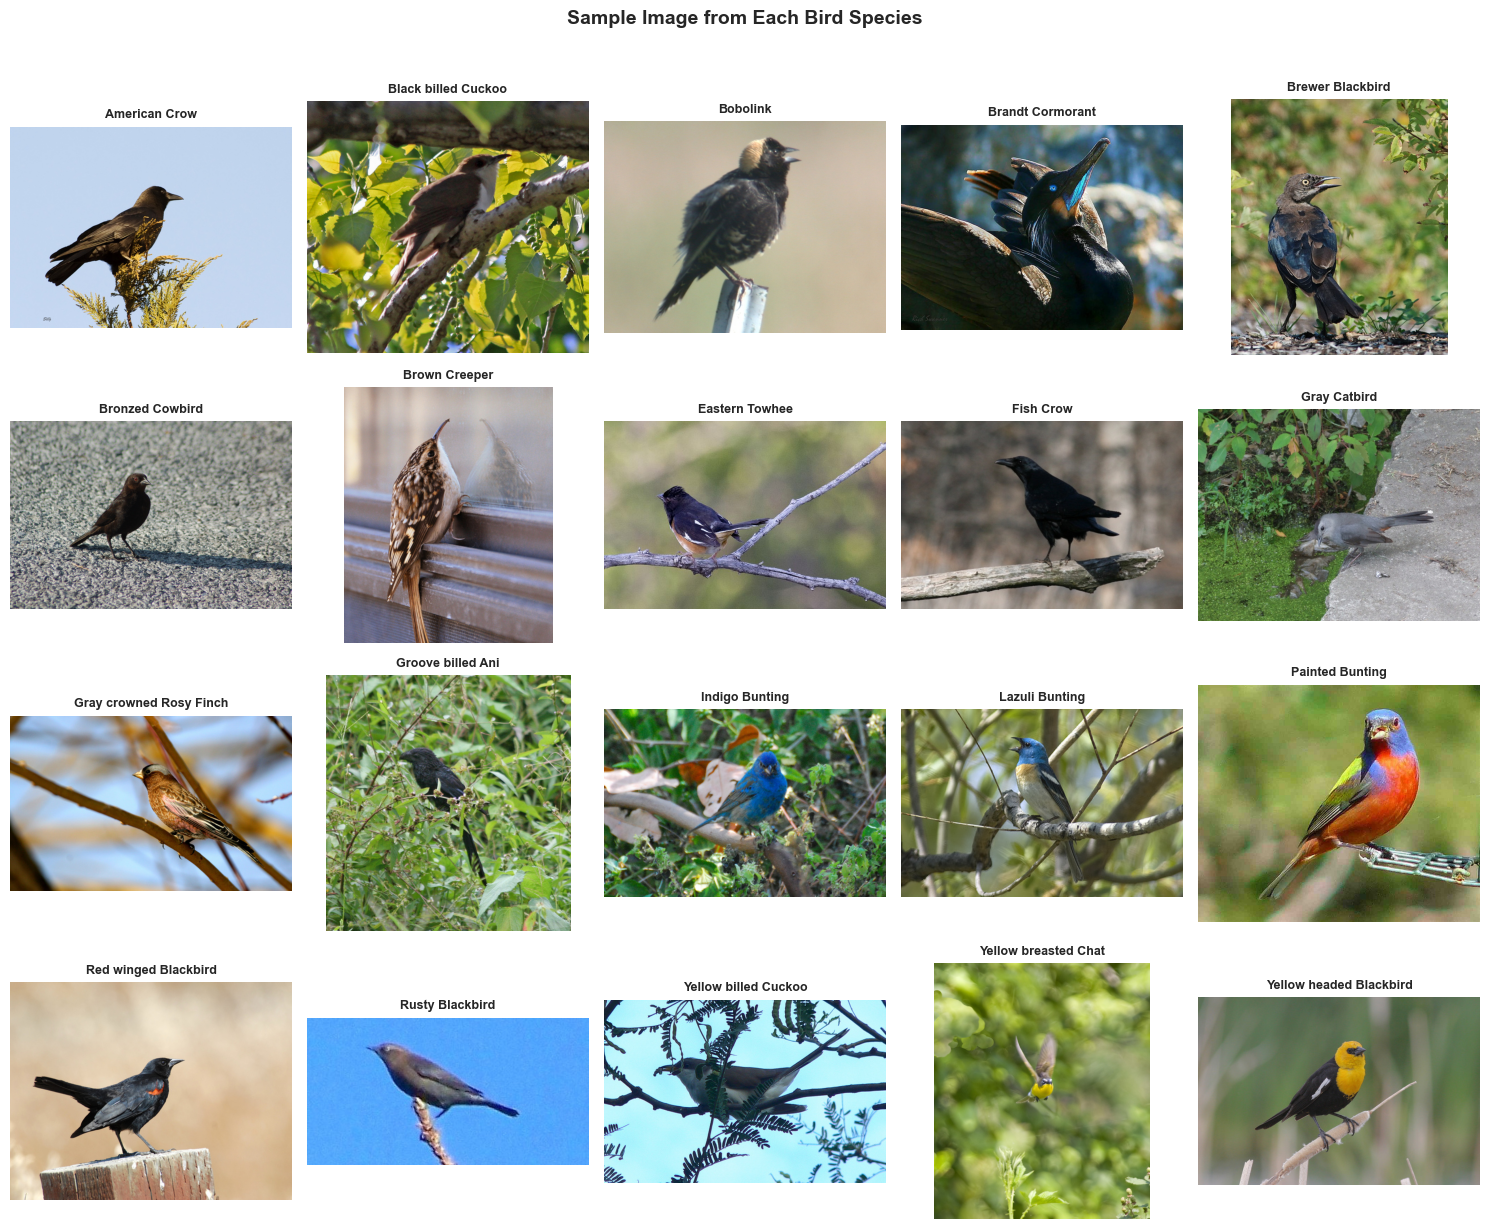

In [10]:
# Display one sample image from each class
classes = sorted(train_df['class'].unique())
n_classes = len(classes)
n_cols = 5
n_rows = (n_classes + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
axes = axes.flatten()

for idx, bird_class in enumerate(classes):
    # Get first image of this class
    sample_path = train_df[train_df['class'] == bird_class]['path'].iloc[0]
    img_path = TRAIN_PATH / sample_path
    
    img = Image.open(img_path)
    axes[idx].imshow(img)
    axes[idx].set_title(bird_class.replace('_', ' '), fontsize=9, fontweight='bold')
    axes[idx].axis('off')

# Hide empty subplots
for idx in range(n_classes, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Sample Image from Each Bird Species', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


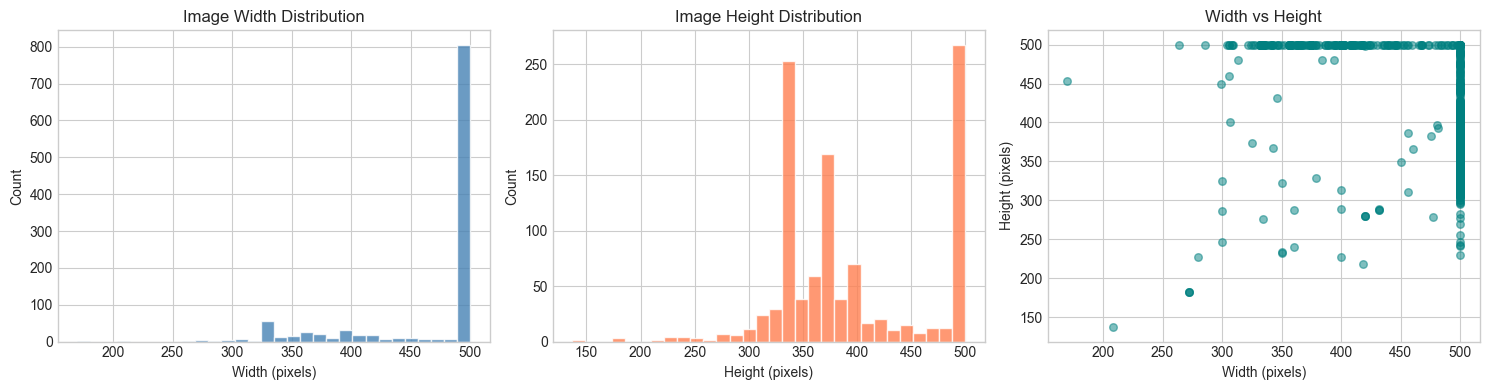


Image Dimension Statistics (1082 images):
Width  - Min: 170, Max: 500, Mean: 468.2
Height - Min: 137, Max: 500, Mean: 395.0


In [11]:
# Analyze image dimensions 
np.random.seed(42)
# sample_size = min(200, len(train_df))
sample_size = len(train_df)

sample_paths = train_df['path'].sample(sample_size).values

widths, heights, aspects = [], [], []

for path in sample_paths:
    img_path = TRAIN_PATH / path
    with Image.open(img_path) as img:
        w, h = img.size
        widths.append(w)
        heights.append(h)
        aspects.append(w / h)

# Visualize dimensions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Width distribution
axes[0].hist(widths, bins=30, color='steelblue', edgecolor='white', alpha=0.8)
# axes[0].axvline(np.mean(widths), color='red', linestyle='--', label=f'Mean: {np.mean(widths):.0f}')
axes[0].set_xlabel('Width (pixels)')
axes[0].set_ylabel('Count')
axes[0].set_title('Image Width Distribution')
axes[0].legend()

# Height distribution
axes[1].hist(heights, bins=30, color='coral', edgecolor='white', alpha=0.8)
# axes[1].axvline(np.mean(heights), color='red', linestyle='--', label=f'Mean: {np.mean(heights):.0f}')
axes[1].set_xlabel('Height (pixels)')
axes[1].set_ylabel('Count')
axes[1].set_title('Image Height Distribution')
axes[1].legend()

# Aspect ratio scatter
axes[2].scatter(widths, heights, alpha=0.5, c='teal', s=30)
axes[2].set_xlabel('Width (pixels)')
axes[2].set_ylabel('Height (pixels)')
axes[2].set_title('Width vs Height')
# axes[2].axline((0, 0), slope=1, color='red', linestyle='--', alpha=0.5, label='1:1 ratio')
axes[2].legend()

plt.tight_layout()
plt.show()

print(f"\nImage Dimension Statistics ({sample_size} images):")
print(f"Width  - Min: {min(widths)}, Max: {max(widths)}, Mean: {np.mean(widths):.1f}")
print(f"Height - Min: {min(heights)}, Max: {max(heights)}, Mean: {np.mean(heights):.1f}")


ideas so far:

- k cross validation after merging val with training
- analyze sizes, need for resizing in data prep for modelling
- check class imbalance
- data augmentation to account for birds diff angles, brightness, reflection, rotation, ....
- maybe data segmentation to remove background can help for some species, or maybe it will hurt? amaybe attention based networks (transformers) can do that implicitly by focusing on important parts
- for modelling, resnet is a must to try, we need to do some research
- in description, it was mentioned we can use additional external data but unlabeled. If so, how that would benefit us (how to make use of this)?
